# Proyecto 2

In [127]:
import numpy as np
import pandas as pd
import sys
from pandas_profiling import ProfileReport
import statistics
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D # for 3D plots
import seaborn as sns; sns.set()  # for plot styling
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling


## Cargar los datos

In [128]:
# Se cargan los datos. 
#Para 2017
df_resp2017=pd.read_csv('./datos/DatosResp2017.csv', sep=';', encoding = "ISO-8859-1")
#Para 2021
df_resp2021=pd.read_csv('./datos/DatosResp2021.csv', sep=';', encoding = "ISO-8859-1")

C:\Users\WIN\AppData\Local\Temp\ipykernel_12560\16182972.py:5: DtypeWarning: Columns (1,8,16,17,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df_resp2021=pd.read_csv('./datos/DatosResp2021.csv', sep=';', encoding = "ISO-8859-1")


In [129]:
columnas_borrado = ["Unnamed: 6" , "Unnamed: 7"]
df_resp2017 = df_resp2017.drop(columnas_borrado, axis=1)

In [130]:
columnas_no_deseadas = [f'Unnamed: {i}' for i in range(4, 31)]
df_resp2021 = df_resp2021.drop(columnas_no_deseadas, axis=1)

In [131]:
#Eliminar las filas con valores nulos (Error de carga del CSV no de los datos)
df_resp2021 = df_resp2021.dropna()

## Entendimiento de los datos 

### Perfilamiento de datos

In [132]:
df_resp2017.head()

,Id,Enfermedad,Basura,Asma,EnfermedadesRespiratorias,Localidad
0,1,2,1,1,1,SUBA
1,2,2,1,1,1,USAQUEN
2,3,2,1,1,1,USAQUEN
3,4,1,1,1,1,USAQUEN
4,5,1,1,1,1,SUBA


In [133]:
df_resp2021.head()

,ï»¿Id,Localidad,Basura,EnfermedadesRespiratorias
0,1.0,Bosa,1.0,2.0
1,2.0,Bosa,1.0,2.0
2,3.0,Bosa,1.0,2.0
3,4.0,Bosa,1.0,2.0
4,5.0,Bosa,1.0,2.0


In [134]:
df_resp2017.shape

(319952, 6)

In [135]:
df_resp2021.shape

(235103, 4)

In [136]:
# Revisar las características de los datos: completitud y tipo de dato
df_resp2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319952 entries, 0 to 319951
Data columns (total 6 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   Id                         319952 non-null  int64 
 1   Enfermedad                 319952 non-null  int64 
 2   Basura                     319952 non-null  int64 
 3   Asma                       319952 non-null  int64 
 4   EnfermedadesRespiratorias  319952 non-null  int64 
 5   Localidad                  221809 non-null  object
dtypes: int64(5), object(1)
memory usage: 14.6+ MB


In [137]:
# Revisar las características de los datos: completitud y tipo de dato
df_resp2021.info()

<class 'pandas.core.frame.DataFrame'>
Index: 235103 entries, 0 to 292280
Data columns (total 4 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ï»¿Id                      235103 non-null  float64
 1   Localidad                  235103 non-null  object 
 2   Basura                     235103 non-null  float64
 3   EnfermedadesRespiratorias  235103 non-null  float64
dtypes: float64(3), object(1)
memory usage: 9.0+ MB


In [138]:
df_resp2017.describe()

,Id,Enfermedad,Basura,Asma,EnfermedadesRespiratorias
count,319952.000000,319952.000000,319952.000000,319952.000000,319952.000000
mean,159976.500000,1.967533,1.070723,1.985226,1.957312
std,92362.331001,0.177238,0.535139,0.120648,0.202152
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,79988.750000,2.000000,1.000000,2.000000,2.000000
50%,159976.500000,2.000000,1.000000,2.000000,2.000000
75%,239964.250000,2.000000,1.000000,2.000000,2.000000
max,319952.000000,2.000000,6.000000,2.000000,2.000000


In [139]:
df_resp2021.describe()

,ï»¿Id,Basura,EnfermedadesRespiratorias
count,235103.000000,235103.000000,235103.000000
mean,148168.624224,1.059178,1.969213
std,84386.807735,0.477486,0.172739
min,1.000000,1.000000,1.000000
25%,75094.500000,1.000000,2.000000
50%,151233.000000,1.000000,2.000000
75%,223184.500000,1.000000,2.000000
max,292281.000000,6.000000,2.000000


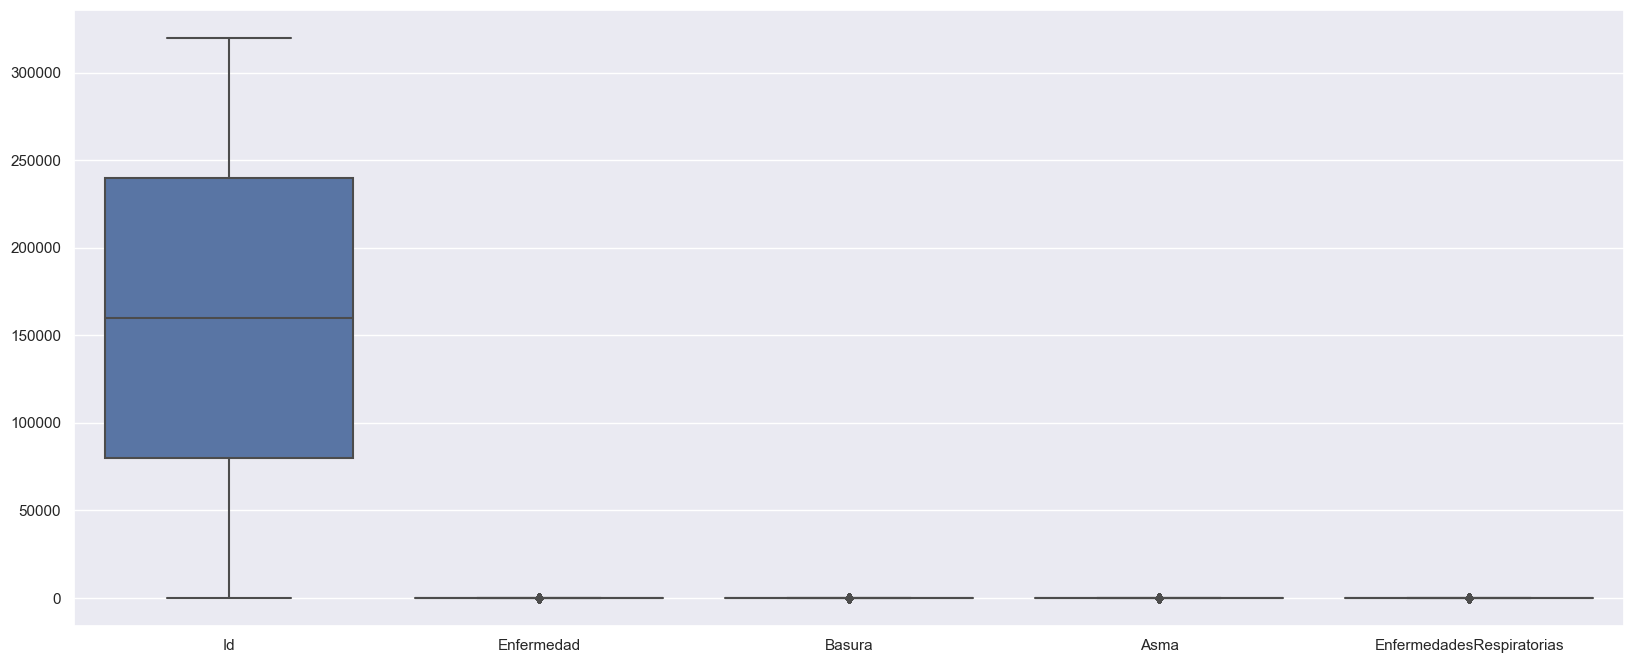

In [140]:
# Resumen de los estadisticos de las variables numéricas
df_resp2017_num = df_resp2017[['Id', 'Enfermedad', 'Basura', 'Asma', 'EnfermedadesRespiratorias']].copy()
#Visualización de todas las variables numéricas
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df_resp2017_num, orient ="v")

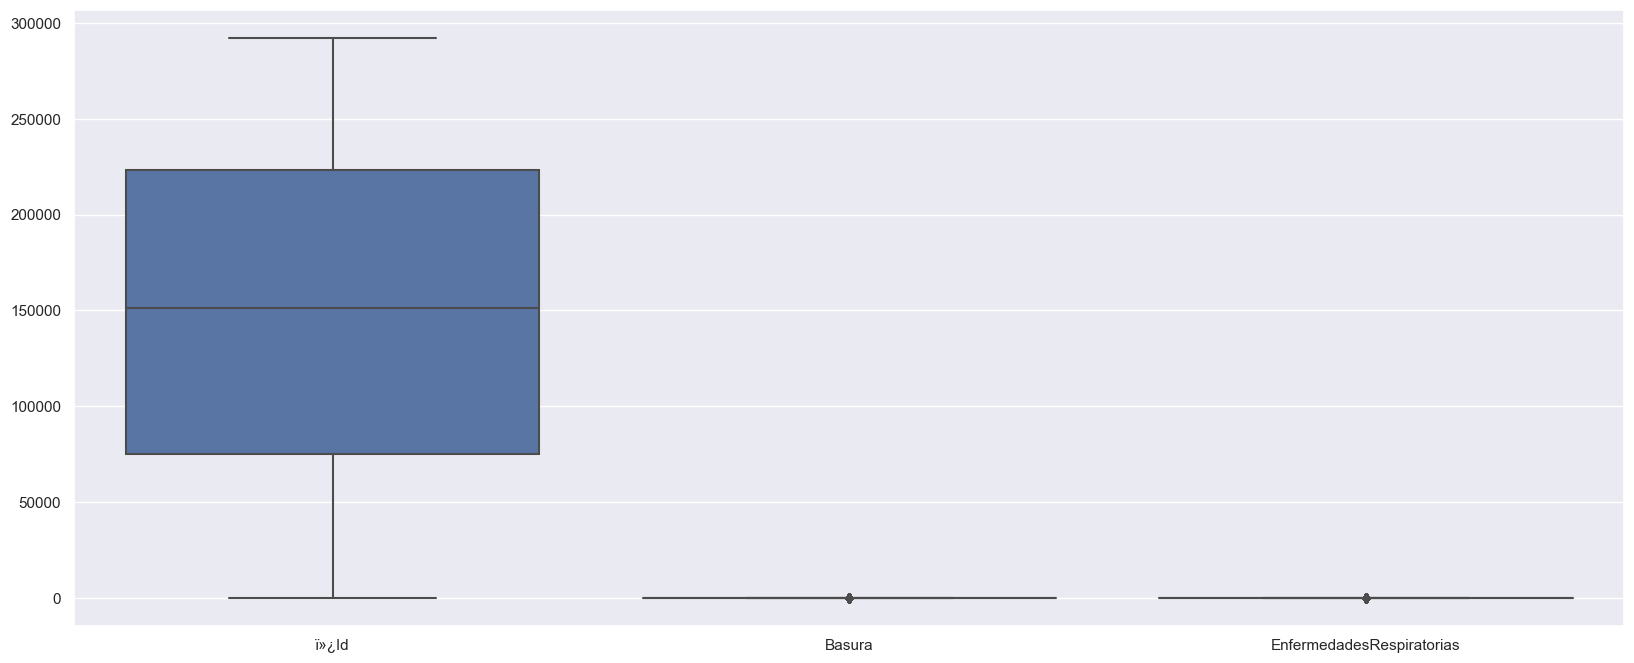

In [141]:
df_resp2021_num = df_resp2021[['ï»¿Id', 'Basura', 'EnfermedadesRespiratorias']].copy()
#Visualización de todas las variables numéricas
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df_resp2021_num, orient ="v")

In [142]:
# Explorar las variables que no son numéricas
name_cols_non_number = df_resp2017.select_dtypes(include = ['object']).columns
name_cols_non_number

Index(['Localidad'], dtype='object')

In [143]:
#Revisar el contenido de las variables que no son numéricas, en este caso son categóricas
df_resp2017[name_cols_non_number].describe()

,Localidad
count,221809
unique,21
top,KENNEDY
freq,28006


In [144]:
# Explorar las variables que no son numéricas
name_cols_non_number = df_resp2021.select_dtypes(include = ['object']).columns
name_cols_non_number

Index(['Localidad'], dtype='object')

In [145]:
#Revisar el contenido de las variables que no son numéricas, en este caso son categóricas
df_resp2021[name_cols_non_number].describe()

,Localidad
count,235103
unique,20
top,Kennedy
freq,26641


## Análisis de calidad de datos

### Completitud

In [146]:
# Cálculo de porcentaje de valores nulos por columna
((df_resp2017.isnull().sum()/df_resp2017.shape[0])).sort_values(ascending=False)

Localidad                    0.306743
Id                           0.000000
Enfermedad                   0.000000
Basura                       0.000000
Asma                         0.000000
EnfermedadesRespiratorias    0.000000
dtype: float64

In [147]:
# Cálculo de porcentaje de valores nulos por columna
((df_resp2021.isnull().sum()/df_resp2021.shape[0])).sort_values(ascending=False)

ï»¿Id                        0.0
Localidad                    0.0
Basura                       0.0
EnfermedadesRespiratorias    0.0
dtype: float64

### Unicidad

In [148]:
#Se revisa si hay registros duplicados
df_resp2017.duplicated(keep = False).sum()

0

In [149]:
#Se revisa si hay registros duplicados
df_resp2021.duplicated(keep = False).sum()

0

### Consistencia

In [150]:
# Se revisa la variable de Basura 
df_resp2017.Basura.value_counts()

Basura
1    313964
6      2406
4      2399
5       608
3       394
2       181
Name: count, dtype: int64

In [151]:
# Se revisa la variable Basura
df_resp2021.Basura.value_counts()

Basura
1.0    231236
4.0      1948
6.0      1206
5.0       342
3.0       300
2.0        71
Name: count, dtype: int64

In [152]:
# Se revisa la variable personas por localidad
df_resp2017.Localidad.value_counts()

Localidad
KENNEDY                 28006
SUBA                    22603
FONTIBON                18746
ENGATIVA                16623
CIUDAD BOLIVAR          16218
USME                    14901
SAN CRISTOBAL           12596
BOSA                    12559
USAQUEN                 12004
PUENTE ARANDA           10243
TEUSAQUILLO              9810
RAFAEL URIBE URIBE       9668
SANTA FE                 8587
BARRIOS UNIDOS           5549
ANTONIO NARIï¿½?O        5474
TUNJUELITO               5281
LOS MARTIRES             4591
CHAPINERO                4089
CANDELARIA               1984
SUMAPAZ                  1232
OTRA LOCALIDAD RURAL     1045
Name: count, dtype: int64

In [153]:
# Se revisa la variable personas por localidad
df_resp2021.Localidad.value_counts()

Localidad
Kennedy               26641
Suba                  24536
Engativa              17780
Ciudad Bolivar        17723
Usaquen               17179
Fontibon              16781
Usme                  13602
San Cristobal         12616
Bosa                  12565
Rafael Uribe Uribe    11796
Teusaquillo           11386
Santa Fe               9949
Puente Aranda          8992
Chapinero              8814
Barrios Unidos         6775
Los Martires           4736
Tunjuelito             4608
Antonio NariÃ±o        4391
La Candelaria          2247
Sumapaz                1986
Name: count, dtype: int64

In [154]:
# Se revisa la variable de personas enfermas
df_resp2017.EnfermedadesRespiratorias.value_counts()

EnfermedadesRespiratorias
2    306294
1     13658
Name: count, dtype: int64

In [155]:
#Se revisa la variable de personas enfermas
df_resp2021.EnfermedadesRespiratorias.value_counts()

EnfermedadesRespiratorias
2.0    227865
1.0      7238
Name: count, dtype: int64

### Validez

En el caso de la validez, al ser datos de una fuente del DANE y con la ayuda del diccionario de datos, todo este conjunto se revisó y no se encontraron valores fuera de lo normal para ningún caso. Esto se ve reflejado en los datatypes y en la carga de los datos hacia PowerBi donde no hubo errores.

## Correción de los datos

In [156]:
df_resp2017.fillna("Localidad desconocida", inplace=True)
df_resp2021.fillna("Localidad desconocida", inplace=True)

In [157]:
# Cálculo de porcentaje de valores nulos por columna
((df_resp2017.isnull().sum()/df_resp2017.shape[0])).sort_values(ascending=False)

Id                           0.0
Enfermedad                   0.0
Basura                       0.0
Asma                         0.0
EnfermedadesRespiratorias    0.0
Localidad                    0.0
dtype: float64

In [158]:
# Cálculo de porcentaje de valores nulos por columna
((df_resp2021.isnull().sum()/df_resp2021.shape[0])).sort_values(ascending=False)

ï»¿Id                        0.0
Localidad                    0.0
Basura                       0.0
EnfermedadesRespiratorias    0.0
dtype: float64

## Imprimir resultados

In [159]:
#2017
df_resp2017.to_csv('DatosResp2017_Modificados.csv', index=False)
#2021
df_resp2021.to_csv('DatosResp2021_Modificados.csv', index=False)